In [3]:
library(tidyverse)
library(forcats)

In [5]:
x1 <- c("Dec", "Apr", "Jan", "Mar")
x2 <- c("Dec", "Apr", "Jam", "Mar")

In [6]:
sort(x1)

[1] "Apr" "Dec" "Jan" "Mar"

In [7]:
month_levels <- c(
  "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
)

In [9]:
(y1 = factor(x1, levels = month_levels))

[1] Dec Apr Jan Mar
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

In [10]:
(y2 = factor(x2, levels=month_levels))

[1] Dec  Apr  <NA> Mar 
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

In [12]:
(f1 = factor(x1, levels = unique(x1)))

[1] Dec Apr Jan Mar
Levels: Dec Apr Jan Mar

In [13]:
f2 = x1  %>% factor()  %>% fct_inorder()

In [14]:
?fct_inorder()

### 15.3 General Social Survey

In [15]:
gss_cat  %>% count(race)

race,n
Other,1959
Black,3129
White,16395


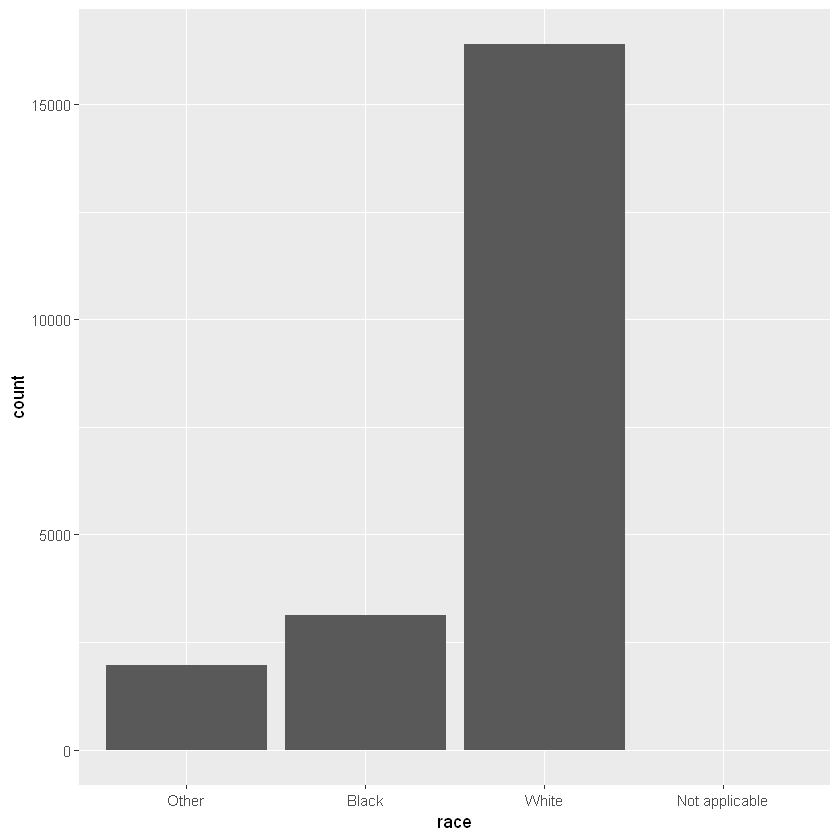

In [18]:
gss_cat %>% ggplot(aes(race)) + geom_bar() + 
    scale_x_discrete(drop = F)

### 15.4 Modifying factor order

In [20]:
relig_summary <- gss_cat %>% 
    group_by(relig)  %>% 
    summarize(
        age = mean(age, na.rm = T),
        tvhours = mean(tvhours, na.rm = T), 
        n = n())

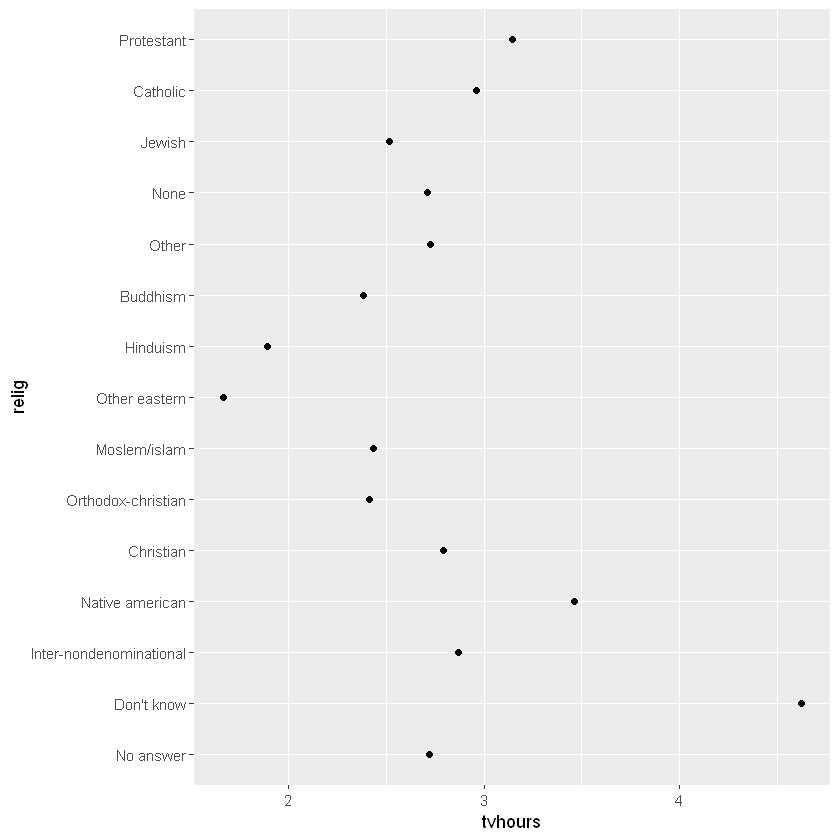

In [21]:
relig_summary  %>% ggplot(aes(tvhours, relig)) + geom_point()

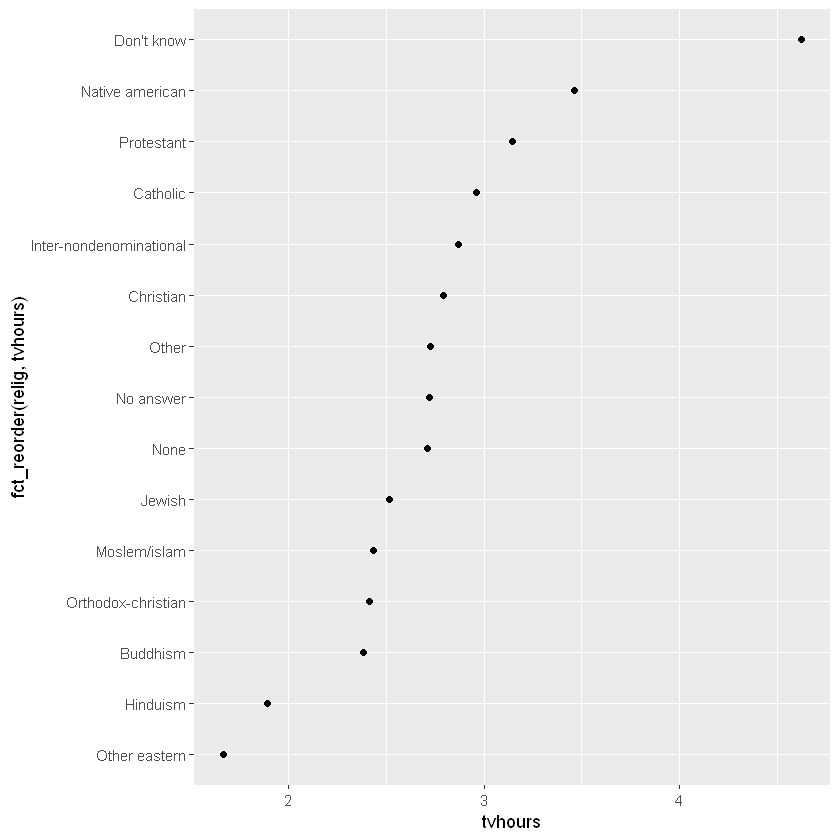

In [23]:
### plot상에서 factor 순서 변경하기
relig_summary  %>% ggplot(aes(tvhours, fct_reorder(relig, tvhours))) + geom_point()

In [25]:
rincom_summary = gss_cat %>% 
    group_by(rincome)  %>% 
    summarize(
    age = mean(age, na.rm = T),
    tvhours = mean(tvhours, na.rm = T),
    n = n())

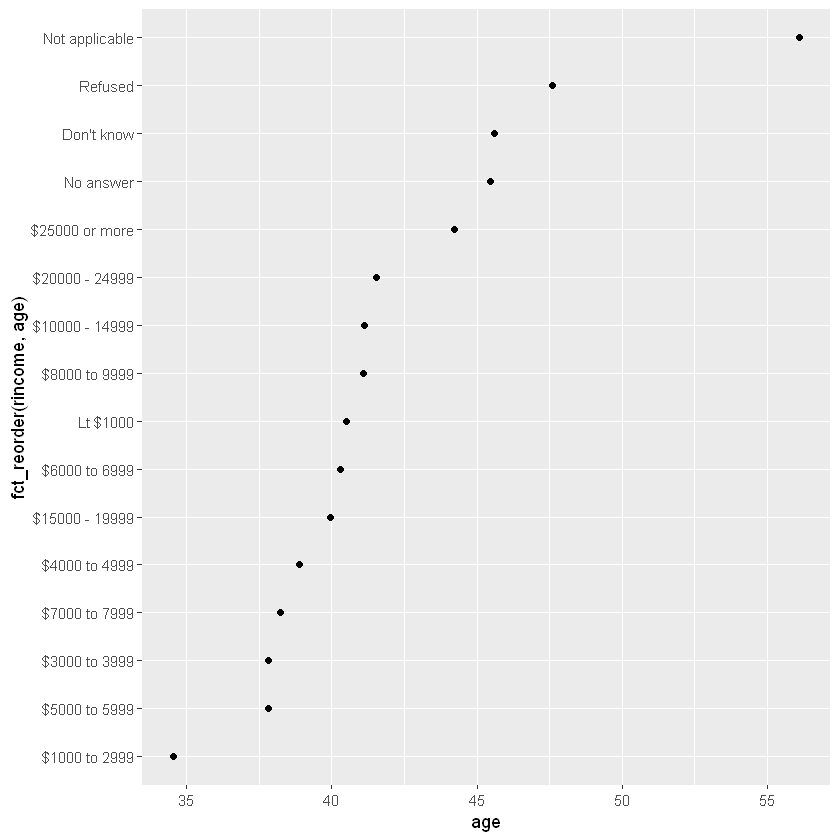

In [28]:
rincom_summary %>% ggplot(aes(age, fct_reorder(rincome, age))) + geom_point()

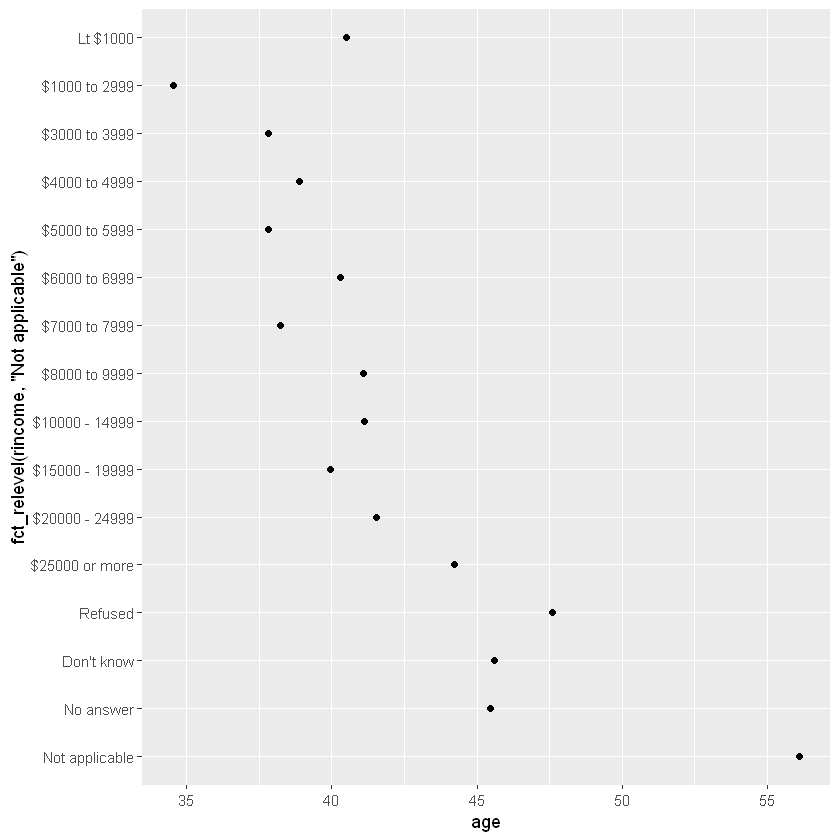

In [29]:
rincom_summary %>% ggplot(aes(age, fct_relevel(rincome, "Not applicable"))) + geom_point()

In [32]:
by_age  <- gss_cat %>% 
    filter(!is.na(age))  %>% 
    count(age, marital)  %>% 
    group_by(age)  %>% 
    mutate(prop = n / sum(n))

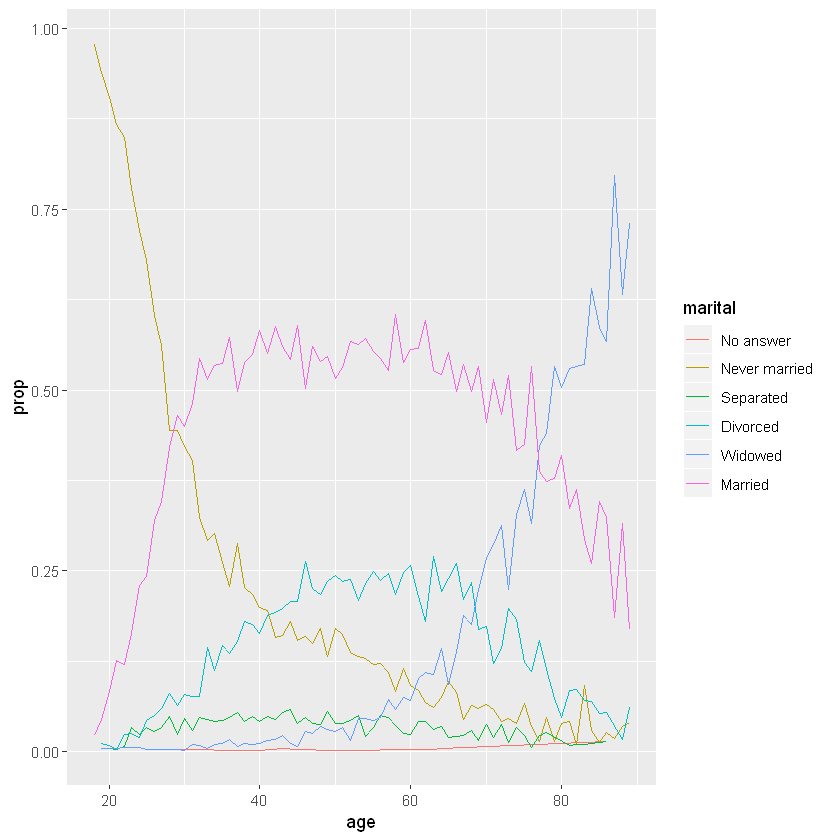

In [34]:
by_age  %>% ggplot(aes(age, prop, color = marital)) + geom_line()

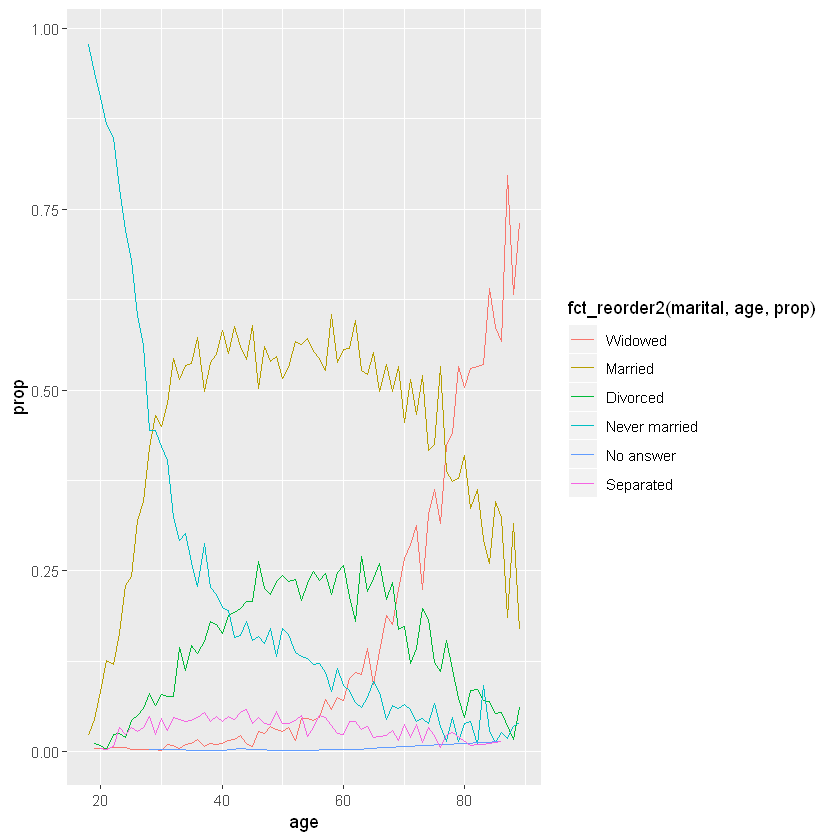

In [35]:
by_age  %>% ggplot(aes(age, prop, color = fct_reorder2(marital, age, prop))) + geom_line()

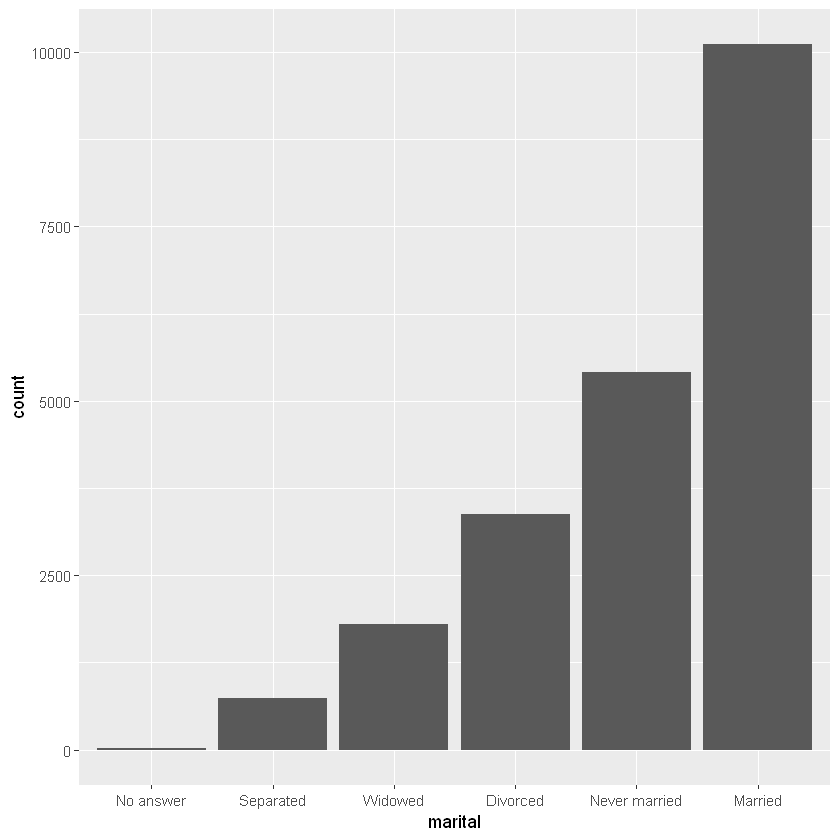

In [37]:
gss_cat  %>% 
    mutate(marital = marital  %>% fct_infreq()  %>% fct_rev())  %>% ggplot(aes(marital)) + geom_bar()

### Modifying factor levels

In [40]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican, strong"    = "Strong republican",
    "Republican, weak"      = "Not str republican",
    "Independent, near rep" = "Ind,near rep",
    "Independent, near dem" = "Ind,near dem",
    "Democrat, weak"        = "Not str democrat",
    "Democrat, strong"      = "Strong democrat"
  )) %>%
  count(partyid)

partyid,n
No answer,154
Don't know,1
Other party,393
"Republican, strong",2314
"Republican, weak",3032
"Independent, near rep",1791
Independent,4119
"Independent, near dem",2499
"Democrat, weak",3690
"Democrat, strong",3490


In [42]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican, strong"    = "Strong republican",
    "Republican, weak"      = "Not str republican",
    "Independent, near rep" = "Ind,near rep",
    "Independent, near dem" = "Ind,near dem",
    "Democrat, weak"        = "Not str democrat",
    "Democrat, strong"      = "Strong democrat",
    "Other"                 = "No answer",
    "Other"                 = "Don't know",
    "Other"                 = "Other party"
  )) %>%
  count(partyid, sort =T)

partyid,n
Independent,4119
"Democrat, weak",3690
"Democrat, strong",3490
"Republican, weak",3032
"Independent, near dem",2499
"Republican, strong",2314
"Independent, near rep",1791
Other,548


In [47]:
gss_cat  %>% 
    mutate(partyid = fct_collapse(partyid,
                                  other = c("No answer", "Don't know", "Other party"),
                                  rep = c("Strong republican", "Not str republican"),
                                  ind = c("Ind,near rep", "Independent", "Ind,near dem"), 
                                    dem = c("Not str democrat", "Strong democrat")))  %>% 
count(partyid)

partyid,n
other,548
rep,5346
ind,8409
dem,7180
